In [1]:
%matplotlib inline

In [69]:
import pandas as pd
import numpy as np

from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [40]:
survey = pd.read_csv("survey_ncr.csv")

# Question 1 : EDA

In [5]:
survey.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,47,Private,10th,6,Executive,Unmarried,ST,Female,45,less than 30 k INR
1,40,Private,10th,6,Mechanic,Unmarried,ST,Male,40,less than 30 k INR
2,30,Private,10th,6,Other-service,Unmarried,ST,Male,40,less than 30 k INR
3,27,Private,10th,6,Taxi-driver,Unmarried,ST,Male,75,less than 30 k INR
4,38,Private,10th,6,Driver,Unmarried,Christians,Female,40,less than 30 k INR


In [6]:
survey.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,29834.0,38.673594,13.011830,18.0,28.0,37.0,47.0,90.0
education_num,29834.0,10.159415,2.535954,1.0,9.0,10.0,13.0,16.0
hours_per_week,29834.0,41.157203,11.809319,1.0,40.0,40.0,45.0,99.0


In [7]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29834 entries, 0 to 29833
Data columns (total 10 columns):
age               29834 non-null int64
job_type          29834 non-null object
education         29834 non-null object
education_num     29834 non-null int64
job               29834 non-null object
marital_status    29834 non-null object
religion          29834 non-null object
gender            29834 non-null object
hours_per_week    29834 non-null int64
income            29834 non-null object
dtypes: int64(3), object(7)
memory usage: 2.3+ MB


In [8]:
survey.dtypes

age                int64
job_type          object
education         object
education_num      int64
job               object
marital_status    object
religion          object
gender            object
hours_per_week     int64
income            object
dtype: object

In [9]:
survey.describe()

,age,education_num,hours_per_week
count,29834.000000,29834.000000,29834.000000
mean,38.673594,10.159415,41.157203
std,13.011830,2.535954,11.809319
min,18.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


In [42]:
for feature in survey.columns: 
    if survey[feature].dtype == 'object': 
        survey[feature] = pd.Categorical(survey[feature]).codes 

/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


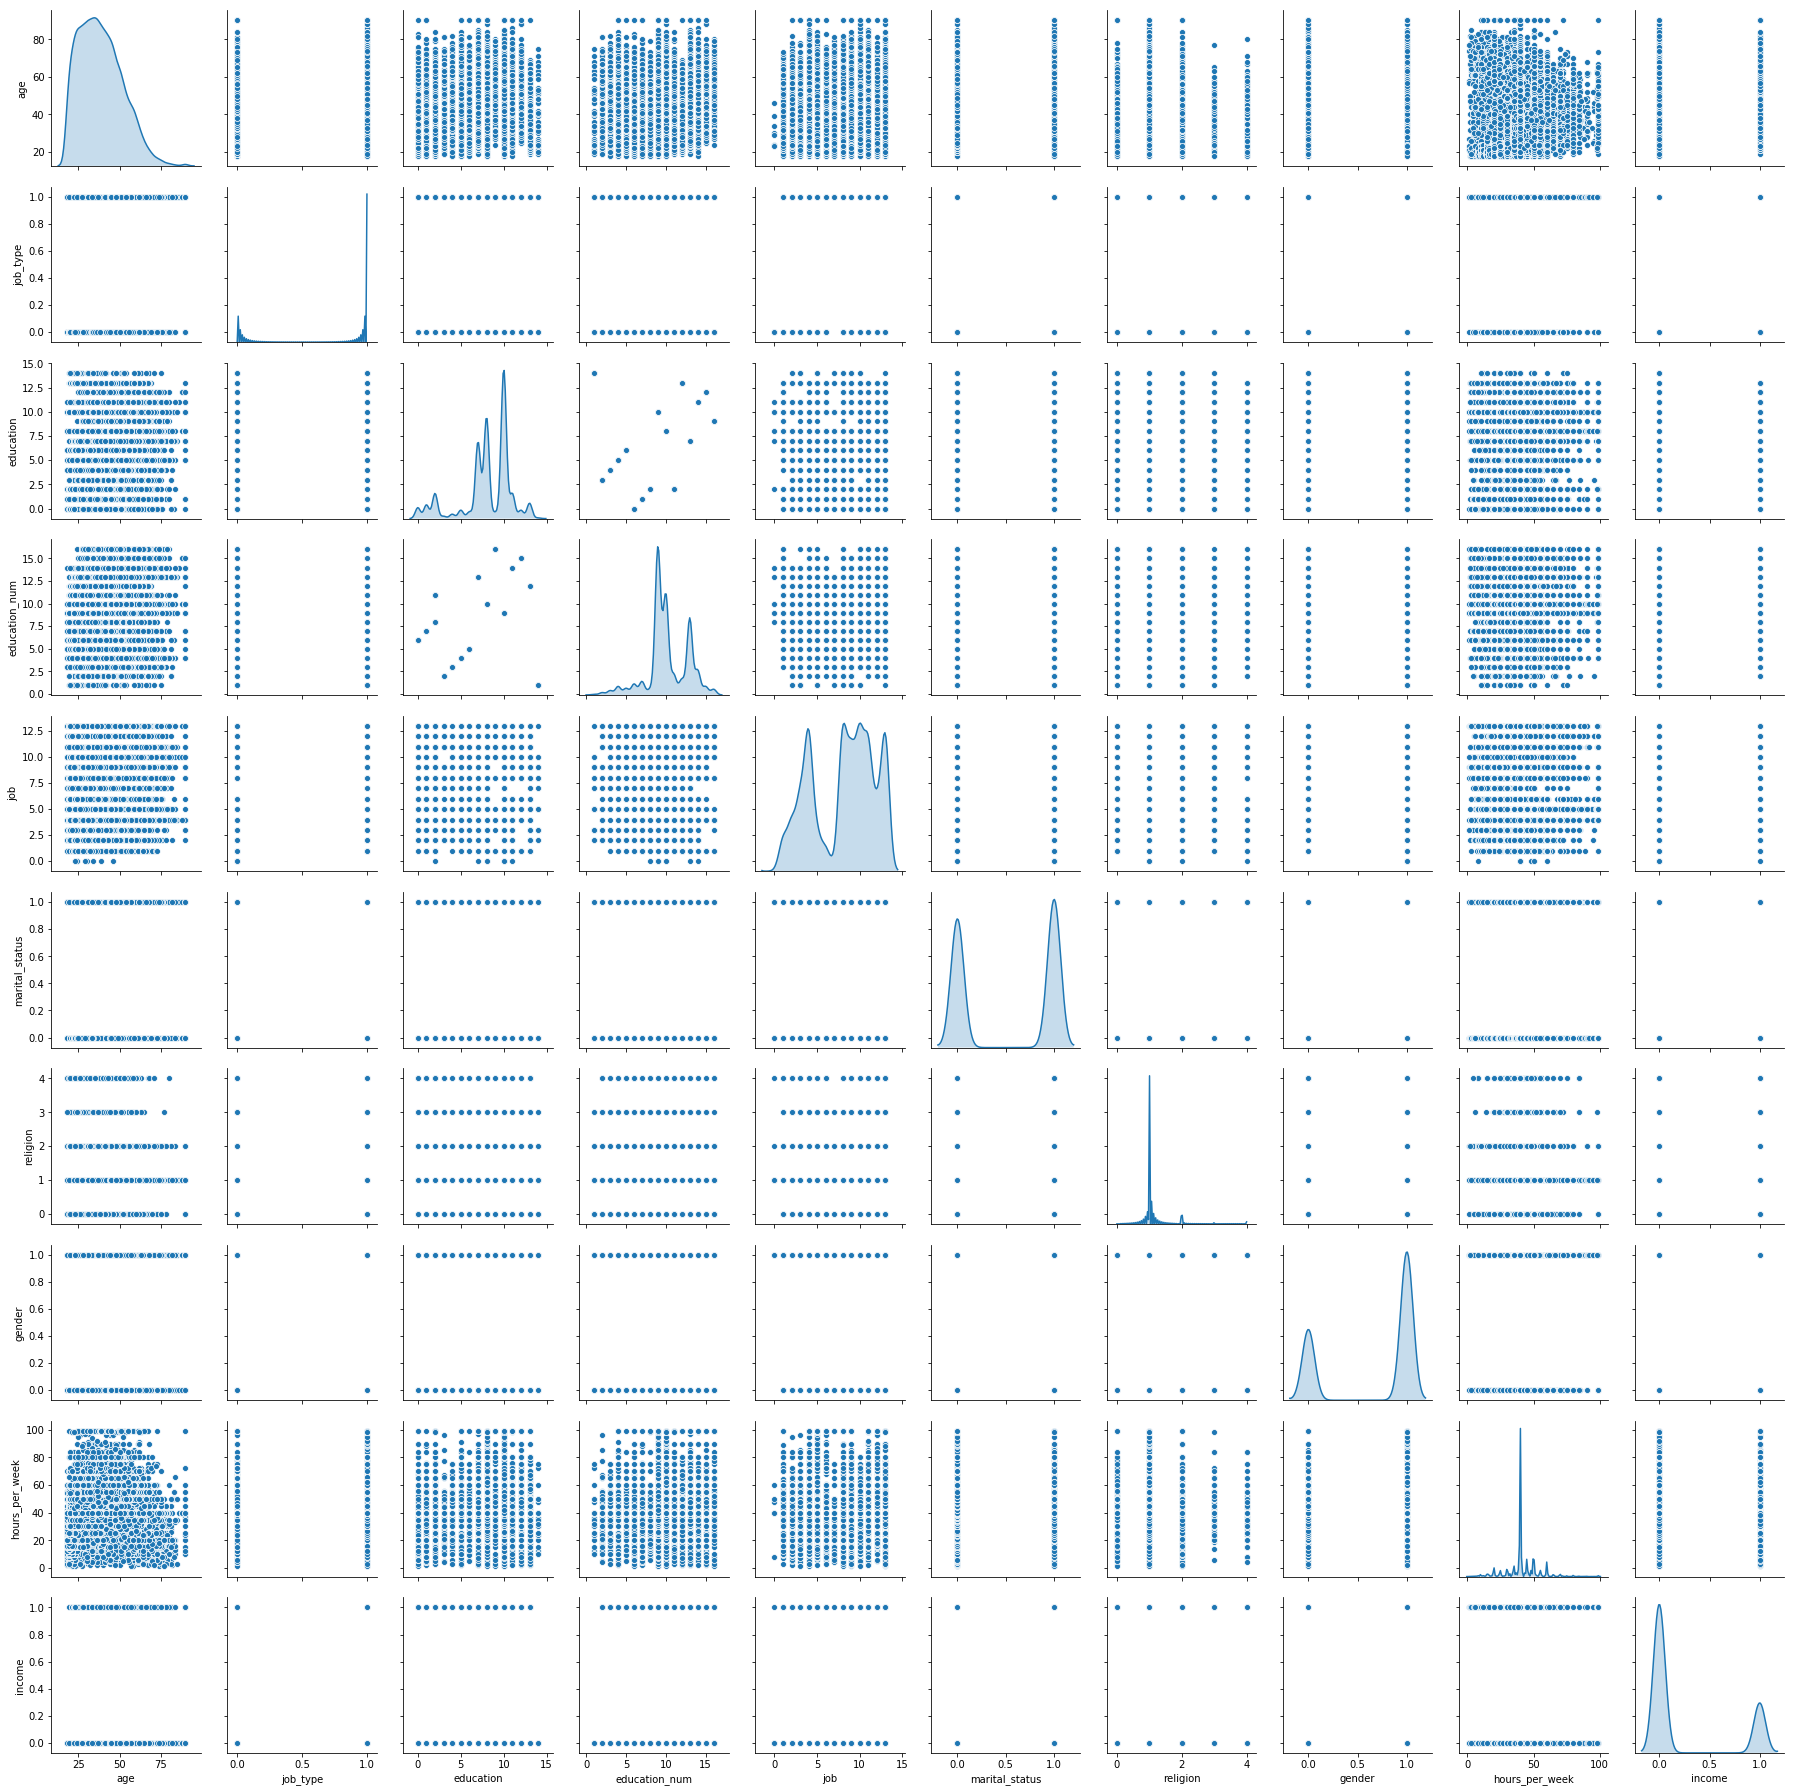

In [11]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(survey , diag_kind = 'kde')

In [12]:
survey.corr()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
age,1.000000,-0.082925,0.027781,0.019638,0.015060,-0.302859,-0.025369,0.078566,0.073311,0.235566
job_type,-0.082925,1.000000,-0.061440,-0.156225,-0.093009,0.008866,-0.050881,0.046821,0.021382,-0.053565
education,0.027781,-0.061440,1.000000,0.321201,0.067309,-0.029959,-0.029919,-0.004809,0.061396,0.089853
education_num,0.019638,-0.156225,0.321201,1.000000,0.193712,-0.074500,-0.103933,0.002247,0.131257,0.330897
job,0.015060,-0.093009,0.067309,0.193712,1.000000,0.037117,-0.016213,-0.118580,-0.029853,0.030691
marital_status,-0.302859,0.008866,-0.029959,-0.074500,0.037117,1.000000,0.093559,-0.441446,-0.213583,-0.446460
religion,-0.025369,-0.050881,-0.029919,-0.103933,-0.016213,0.093559,1.000000,-0.082136,-0.040093,-0.087919
gender,0.078566,0.046821,-0.004809,0.002247,-0.118580,-0.441446,-0.082136,1.000000,0.230663,0.216729
hours_per_week,0.073311,0.021382,0.061396,0.131257,-0.029853,-0.213583,-0.040093,0.230663,1.000000,0.223404
income,0.235566,-0.053565,0.089853,0.330897,0.030691,-0.446460,-0.087919,0.216729,0.223404,1.000000


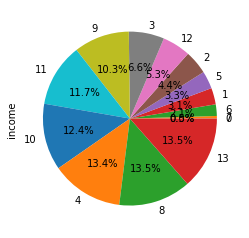

In [76]:
survey.groupby(['job']).income.count().sort_values().plot(kind = 'pie',autopct='%1.1f%%');

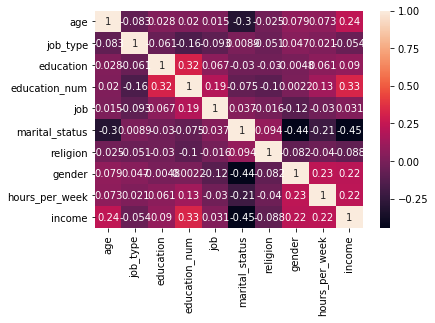

In [13]:
sns.heatmap(survey.corr(), annot=True)

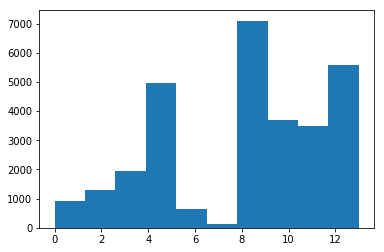

In [14]:
from matplotlib import pyplot
pyplot.hist(survey.job)
pyplot.show()

Army : 0,
Call Center : 1,
Domestic Servants : 2,
Driver : 3,
Executive : 4,
Farmer : 5,
Fireman : 6,
Manager : 7,
Mechanic : 8,
Other-service : 9,
Police : 10,
Sales : 11,
Taxi-driver : 12,
Teacher : 13

There are more number of mechanics and teachers compared to all

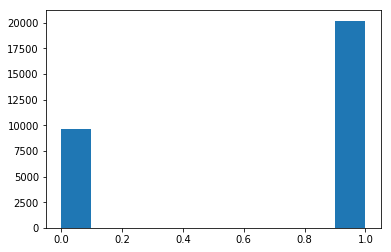

In [15]:
from matplotlib import pyplot
pyplot.hist(survey.gender)
pyplot.show()

More number of males than females

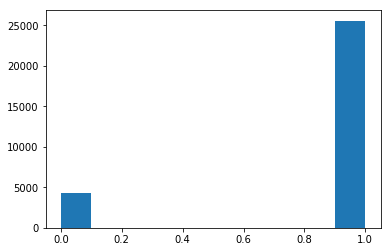

In [16]:
from matplotlib import pyplot
pyplot.hist(survey.job_type)
pyplot.show()

Very few people with goverment jobs. More than 80 % are private jobs

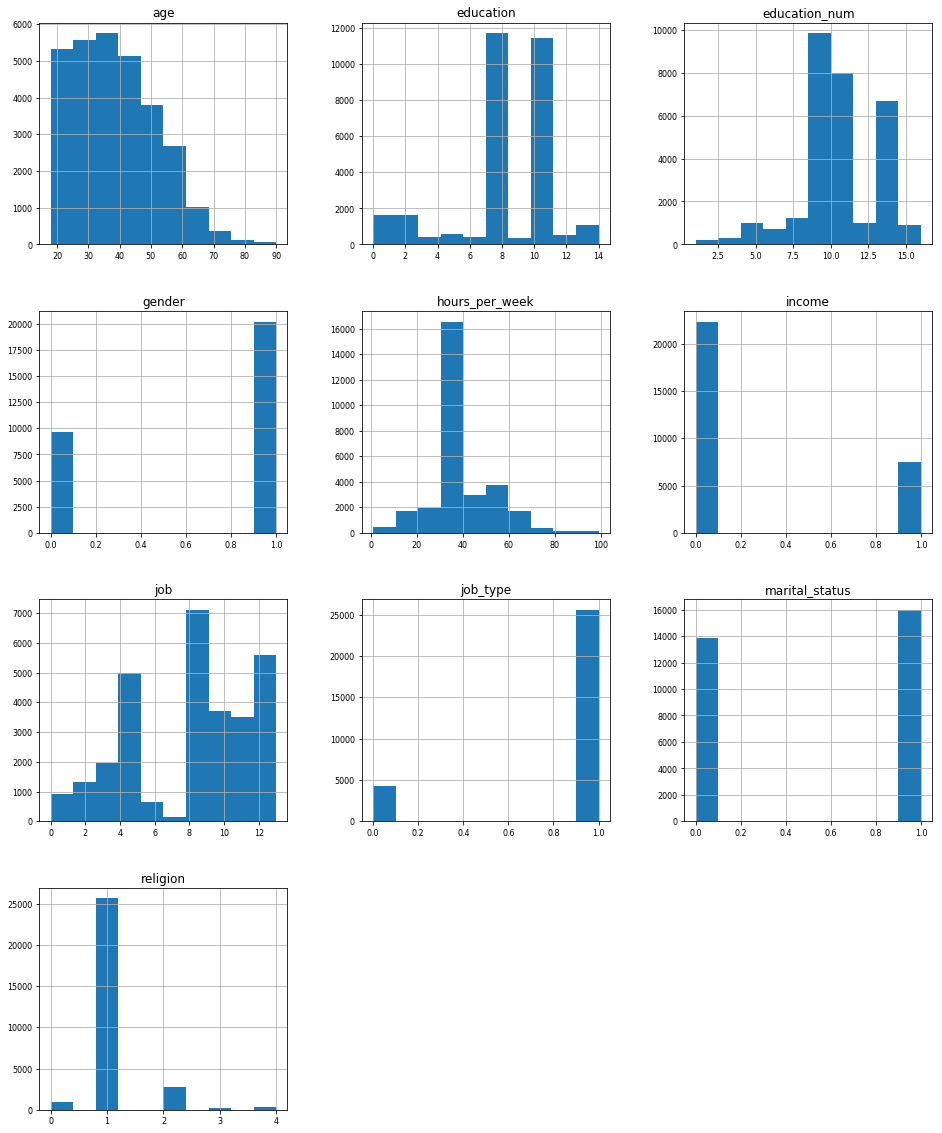

In [74]:
survey.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8);

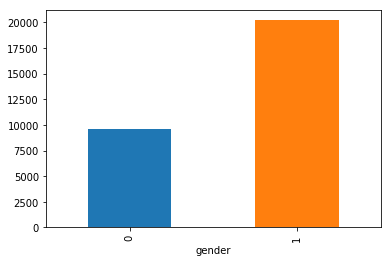

In [75]:
survey.groupby('gender').job.count().plot(kind = 'bar')

# Diving into train and test

In [58]:
train_set = survey.head(500)
test_set = survey.tail(500) 


train_labels = train_set.pop("income")
test_labels = test_set.pop("income")


In [19]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' , random_state=1)

In [20]:
dt_model.fit(train_set, train_labels )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [21]:
dt_model.score(test_set , test_labels)

0.922

In [22]:
dt_model.score(train_set, train_labels)

0.984

In [23]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=1 )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [24]:
print(dt_model.score(train_set , train_labels))

print(dt_model.score(test_set , test_labels))

0.906
0.926


 Ensemble  - Bagging

In [25]:
income_labels = survey.pop("income")

In [26]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True , random_state=1)#oob means out of bag

bgcl = bgcl.fit(survey, income_labels)
print(bgcl.oob_score_)

0.8142387879600456


# Question 2 Ensemble - Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 30, random_state=1)
rfcl = rfcl.fit(train_set, train_labels)

In [100]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.936

In [101]:
print(rfcl.feature_importances_)

[0.49766491 0.01721147 0.         0.         0.19974695 0.04407109
 0.03985838 0.01901397 0.18243322]


# Question 3 Ensemble - Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 30, random_state=1)
gbcl = gbcl.fit(train_set, train_labels)

In [30]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.938

In [66]:
print(gbcl.feature_importances_)

[0.4081533  0.00806453 0.         0.         0.21279245 0.17373791
 0.03318949 0.01508976 0.14897256]


# Question 4 : Improve accuracy by optimizing hyperparameters 

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=2)
rfcl = rfcl.fit(train_set, train_labels)

In [32]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.938

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=2)
gbcl = gbcl.fit(train_set, train_labels)

In [34]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.938

In [43]:
survey_z = survey.apply(zscore)

In [44]:
y = survey[['income']]


In [45]:
X = survey_z.drop(labels= "income" , axis = 1)

In [46]:
survey_XY = X.join(y)

In [47]:
values = survey_XY.values

In [48]:
from sklearn.utils import resample

In [50]:
from pprint import pprint

In [51]:
from sklearn.tree import DecisionTreeRegressor
rf = DecisionTreeRegressor(random_state = 1)

In [52]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'best'}


In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 1)

In [54]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [55]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [56]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(train_labels,train_set);

Fitting 3 folds for each of 5 candidates, totalling 15 fits

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [83]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
} 

In [84]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0,scoring = ftwo_scorer, return_train_score=True)

In [94]:
grid_search.fit(train_set, train_labels);

/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anacond

/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anacond

/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anacond

/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anacond

/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anacond

/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nagmedishetty/anacond

In [95]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 6}

In [ ]:
best_grid.score(train_labels,train_labels)

In [ ]:
best_grid = grid_search.best_estimator_
best_grid.score(train_labels, train_set)

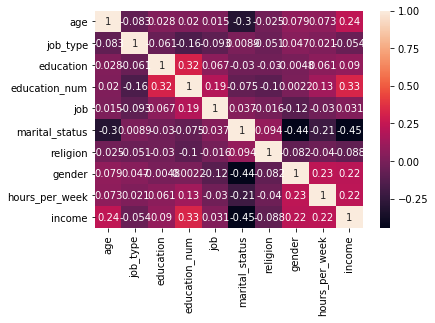

In [62]:
sns.heatmap(survey.corr(), annot=True)

# Question 5

In [102]:
importances = rfcl.feature_importances_

In [103]:
importances

array([0.49766491, 0.01721147, 0.        , 0.        , 0.19974695,
       0.04407109, 0.03985838, 0.01901397, 0.18243322])

# Question 6 

In [67]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [70]:
lrcl = LogisticRegression(random_state=1)
rfcl = RandomForestClassifier(random_state=1)
nbcl = GaussianNB()
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50 , random_state=1)  

enclf = VotingClassifier(estimators = [('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl)], voting = 'hard')

In [72]:
for clf, label in zip([lrcl , rfcl, nbcl, enclf, bgcl], ['Logistic Regression', 'RandomForest', 'NaiveBayes', 'Ensemble', 'Bagging']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

Accuracy: 0.81 (+/- 0.04) [Logistic Regression]


/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Accuracy: 0.66 (+/- 0.15) [RandomForest]
Accuracy: 0.75 (+/- 0.09) [NaiveBayes]


/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d arr

Accuracy: 0.76 (+/- 0.08) [Ensemble]


/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nagmedishetty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d arr

Accuracy: 0.66 (+/- 0.15) [Bagging]


Random forest is giving the highest accuracy